In [50]:
Link to the dataset

https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

### Import neccessary packages

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, validation_curve
import statsmodels.api as sm
import seaborn as sns

### Importing dataframe and visualization

In [3]:
data = pd.read_csv('framingham.csv')

In [4]:
data = data.rename(columns ={"male":"Gender" })

In [5]:
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
data.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
data.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


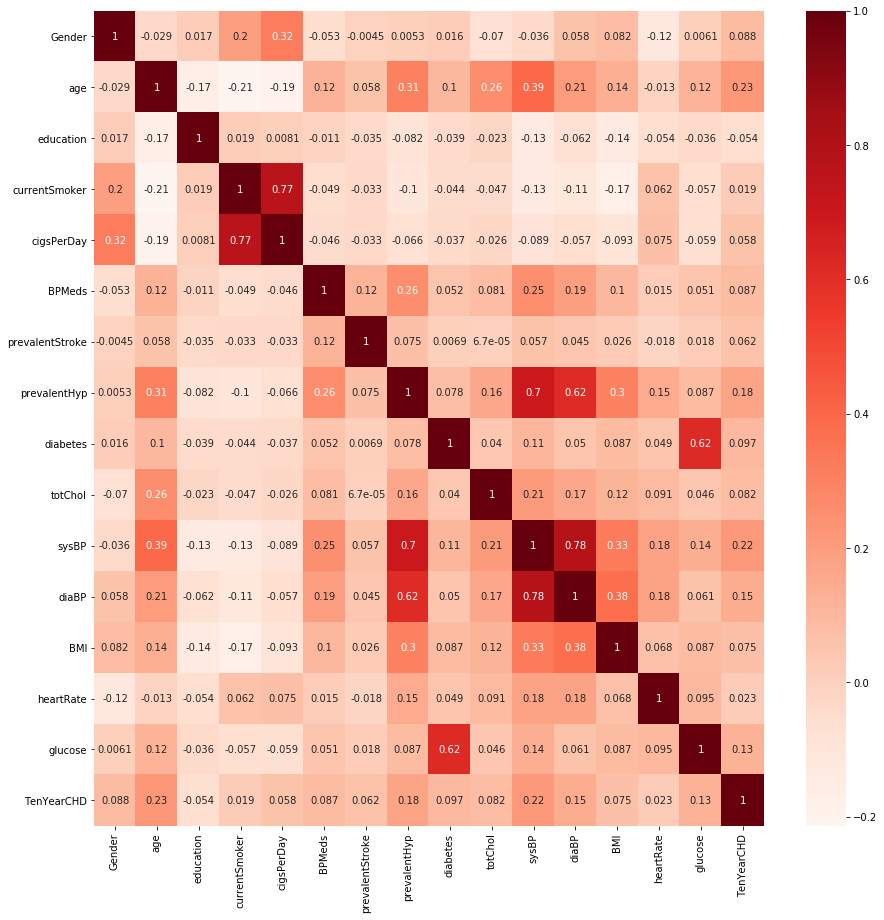

In [9]:
#Looking at the correlation matrix, i can see what predictors would more likely affect the predition
#Features with higher values have a larger effect on the dependent variable
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

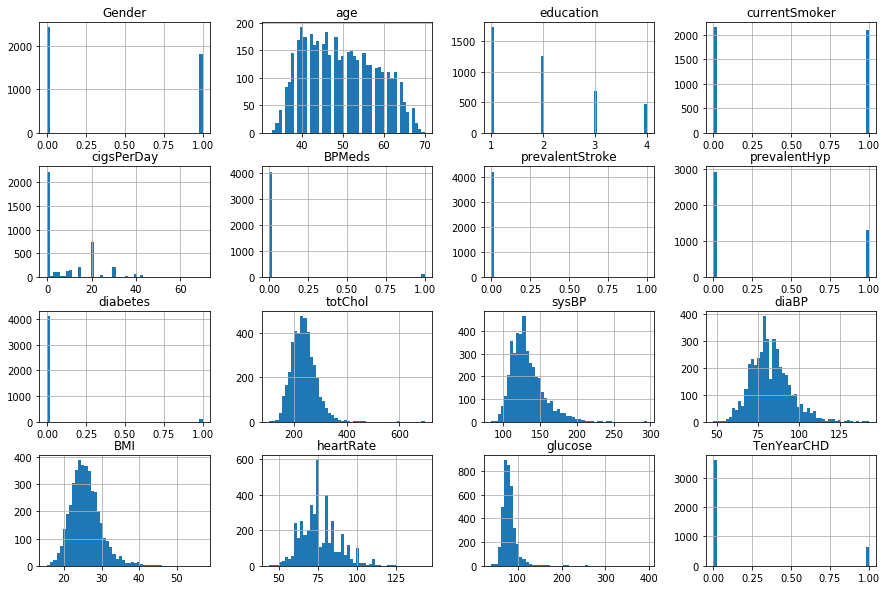

In [10]:
#The histogram plots give a good understanding of how the data is layed out for each of the predictors
data.hist(bins = 50, figsize= (15,10))
plt.show()

In [18]:
#Drop all null values from dataframe
data = data.dropna()

In [19]:
#Assign X and y variables
X = data.drop(['TenYearCHD'],axis=1)
y = data["TenYearCHD"]

In [20]:
#Backward Elimination, to pick the most influencial features in the model
# There were 6 features that had the highest influence
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Gender', 'age', 'cigsPerDay', 'prevalentStroke', 'sysBP', 'glucose']


In [33]:
#Update X variable with important features
features = ['Gender', 'age', 'cigsPerDay', 'prevalentStroke', 'sysBP', 'glucose']
X = data[features]

In [34]:
#split the data into training and test set with 20% of the data being in the test set
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.20, random_state = 42)

In [52]:
#There are 2489 values for patient with no 10 year risk of coronary heart disease CHD, and 435 patients with a 10 year risk of coronary heart disease CHD
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 2489, 1: 435})

In [41]:
#Random Forest Classifier model was used first
# The number of trees used is 100
# the accuracy of the model was 85.7%
rf = RandomForestClassifier(n_estimators=100, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[606   4]
 [120   2]]


Accuracy of Random Forest: 83.06010928961749 

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       610
           1       0.33      0.02      0.03       122

    accuracy                           0.83       732
   macro avg       0.58      0.50      0.47       732
weighted avg       0.75      0.83      0.76       732



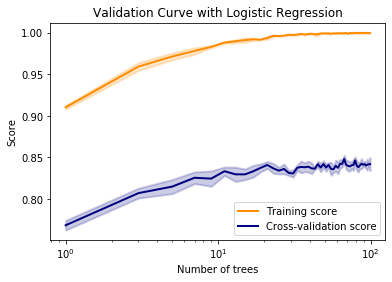

In [42]:
#Validation Curve Plot using random forest regression
#there was a 10% difference betweeen the training score and cross validation score
train_scores_rf, valid_scores_rf = validation_curve(RandomForestClassifier(),X_train, y_train, "n_estimators",np.arange(1,100,2),cv=3, scoring="accuracy",n_jobs=-1)

param_range = np.arange(1,100,2)
train_scores_mean = np.mean(train_scores_rf, axis=1)
train_scores_std = np.std(train_scores_rf, axis=1)
test_scores_mean = np.mean(valid_scores_rf, axis=1)
test_scores_std = np.std(valid_scores_rf, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Number of trees")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [43]:
#The second model used is logistic regression
#The model had very close accuracy to random forest, with an accuracy of 85.7%
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[604   6]
 [111  11]]


Accuracy of Logistic Regression: 84.01639344262296 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.65      0.09      0.16       122

    accuracy                           0.84       732
   macro avg       0.75      0.54      0.53       732
weighted avg       0.81      0.84      0.79       732



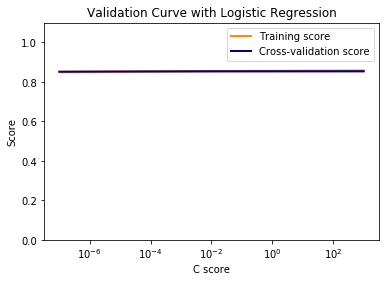

In [51]:
#Validation Curve Plot using logistic regression
#The training and cross validation scores were equal and moving at a straight line, which could mean the model is not being affected by the parameters
train_scores, valid_scores = validation_curve(LogisticRegression(),X_train, y_train, "C",np.logspace(-7, 3, 3),cv=5)
param_range = np.logspace(-7, 3, 3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C score")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [45]:
#The final model i used was GaussianNB, this model performed the poorest at an accuracy of 82.4
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[589  21]
 [107  15]]


Accuracy of Naive Bayes model: 82.5136612021858 

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       610
           1       0.42      0.12      0.19       122

    accuracy                           0.83       732
   macro avg       0.63      0.54      0.55       732
weighted avg       0.77      0.83      0.78       732



In [46]:
#Conducted a grid search on the data to see if it has a potential of improving the accuracy
param_grid = {'penalty':['l1','l2'], 
              'C':np.logspace(-3,3,7)}
grid_search = GridSearchCV(estimator = lr,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10
                           ,verbose=0)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:   ",grid_search.best_params_)
print("Accuracy:   ",grid_search.best_score_)

Best hyperparameters:    {'C': 0.1, 'penalty': 'l2'}
Accuracy:    0.8550002337650195


In [47]:
# the accuracy score did not improve using grid search
score2=cross_val_score(grid_search,X_train,y_train,cv=10)
score2.mean()

0.8546577680115949

In [48]:
param_grid_rf = {'n_estimators': [20, 200],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}
grid_search_rf = GridSearchCV(estimator = rf,  
                           param_grid = param_grid_rf,
                           cv = 5)
grid_search_rf.fit(X_train, y_train)
print("Best hyperparameters:   ",grid_search_rf.best_params_)
print("Accuracy:   ",grid_search_rf.best_score_)

Best hyperparameters:    {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 20}
Accuracy:    0.8546499238964993


In [49]:
score2=cross_val_score(grid_search_rf,X_train,y_train,cv=5)
score2.mean()

0.854649338484955

In [55]:
#Setting pipeline with standard scaler and logistic regression using best features
final_pipeline = Pipeline(steps=[('std_scaler', StandardScaler()),
                      ('classifier', LogisticRegression(C = 0.1, penalty = 'l2'))])

In [56]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=0.1))])

In [57]:
final_pipeline.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,